In [1]:
from implicit.nearest_neighbours import bm25_weight
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import pandas as pd
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/Users/freddiewoods/.pyenv/versions/3.11.6/envs/music-recommendation/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# Create a spotify client:
client_id = os.environ.get("SPOTIFY_CLIENT_ID")
client_secret = os.environ.get("SPOTIFY_CLIENT_SECRET")

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                                client_secret=client_secret))

In [3]:
def get_playlist_track(spotify, playlist_id):
    df = pd.DataFrame(spotify.playlist_tracks(playlist_id))
    tracks = df['items']

    track_ids = []
    for row in tracks:
        track_ids.append(row['track']['id'])
    return [tracks, track_ids]



def get_album_track_ids(spotify, album_id):
    df = pd.DataFrame(spotify.album_tracks(album_id))
    tracks = df['items']
    track_ids = []
    for row in tracks:
        track_ids.append(row['id'])
    return track_ids



In [4]:
def get_audio_features_ids(spotify, track_ids):
    """
    Returns each of the spotify audio features associated to each track in track ID's
    
    Input
        spotify; authenticated spotipy module
        track_ids; list of string, the list of track ids to check.
    Output
        audio_features: Dataframe, A dataframe where each row represents a track
    """
    audio_features = []
    # Since the track ID is already obtained there is no need to look up the tracks

    # Since the track ID is already obtained there is no need to look up the tracks
    audio_features = ['danceability','energy', 'loudness', 'acousticness', 'instrumentalness', 'speechiness', 'valence', 'tempo']
    df = pd.DataFrame(audio_features, columns=audio_features)

    tack_audio_features = spotify.audio_features(track_ids)

    return (tack_audio_features)

In [5]:
whale_track_ids = get_playlist_track(spotify, '5v0XNgUfSqaDSZ6SkJkN7E')
whale_audio_features = get_audio_features_ids(spotify, whale_track_ids)

diplodocus_track_ids = get_playlist_track(spotify, '0uVFKr62yzgcN8iKzGACgQ')
diplodocus_audio_features = get_audio_features_ids(spotify, diplodocus_track_ids)


otter_track_ids = get_playlist_track(spotify, '4miL1mCdLmcmDzFwCM2f3a')
otter_audio_features = get_audio_features_ids(spotify, otter_track_ids)

happy_track_ids = get_playlist_track(spotify, '1M6WFHCNeMgPHhS77kAP60')
happy_audio_features = get_audio_features_ids(spotify, happy_track_ids)

# object = get_playlist_track(spotify, '6dRyzB98tA2Wh8mXV5hrm4')
# top_100_tracks = object[0]
# top_100_track_ids  = object[1]

In [6]:


df = pd.json_normalize(top_100_tracks)



In [7]:
df_tracks_first_half = spotify.tracks(df['track.id'][:50])
df_tracks_second_half = spotify.tracks(df['track.id'][49:99])

In [8]:
tracks_df = pd.json_normalize(df_tracks_first_half['tracks'])

In [9]:
tracks_df.columns

Index(['artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.isrc',
       'external_urls.spotify'],
      dtype='object')

In [13]:
# df['track.id']

top_100_tracks_audio_features = get_audio_features_ids(spotify, df['track.id'])

0     3B3eOgLJSqPEA0RfboIQVM
1     0RstfX9nRY1Lfuy1808MoT
2     5YqpHuXpFjDVZ7tY1ClFll
3     2tijppLc0gaWA2AfPDANvq
4     5bs5GopDitBx9xjoHHRDoo
               ...          
95    6gVVzu1rKMHx1Ho5dRExvJ
96    4xy9nsO8EX4OR0c6lf0WFu
97    6NOdD9M3uXCQbHoxLChMn0
98    4tqcoej1zPvwePZCzuAjJd
99    35esL6crd33KHmrpVFHFj4
Name: track.id, Length: 100, dtype: object

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

 
fig = plt.figure(figsize =(10, 7))
 
data =[{"🐳" : whale_audio_features['valence'].values}, {"🦕": diplodocus_audio_features['valence'].values}, {"🦦": otter_audio_features['valence'].values}, {"🕺": happy_audio_features['valence'].values}]

real_data =[whale_audio_features['valence'].values, diplodocus_audio_features['valence'].values, otter_audio_features['valence'].values,  happy_audio_features['valence'].values]

fig = plt.figure(figsize =(10, 7))
 

# Creating axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(["Whale","Diplo","Otter","yucky dance stuff"])
# Creating plot
bp = ax.boxplot(real_data)
 
# show plot
plt.show()


 
# show plot
plt.show()

NameError: name 'whale_audio_features' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
print(whale_track_ids[whale_audio_features['valence'].idxmin()])

3hWfXpVhqsALMNxzGcCxeI


In [ ]:
spotify.track("3hWfXpVhqsALMNxzGcCxeI")['name']

'Warm Glow'

In [ ]:
whale_rec_track_ids = get_playlist_track_ids(spotify, '2Vjg4BQi0ILYyEN5lr9Lma', start=73)
whale_rec_audio_features = get_audio_features_ids(spotify, whale_rec_track_ids)

<Figure size 1000x700 with 0 Axes>

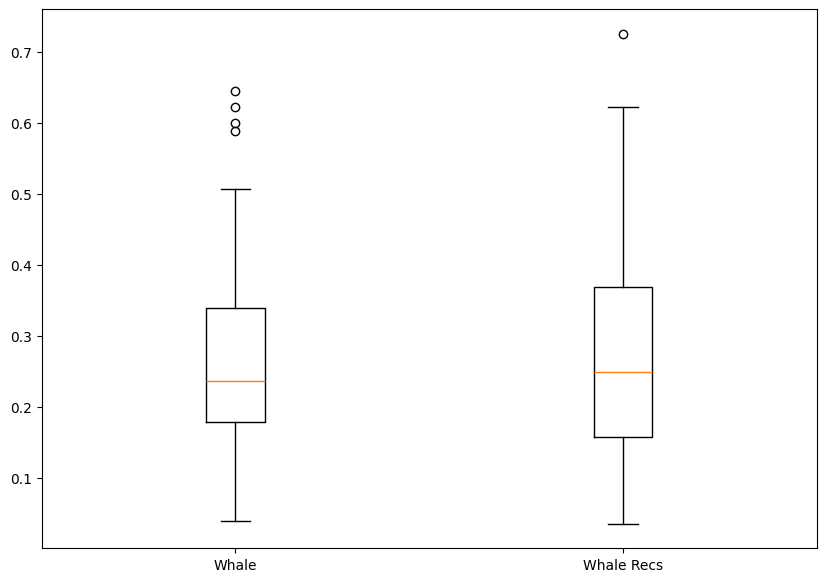

In [ ]:
fig = plt.figure(figsize =(10, 7))
 

real_data =[whale_audio_features['valence'].values, whale_rec_audio_features['valence'].values]

fig = plt.figure(figsize =(10, 7))
 

# Creating axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(["Whale","Whale Recs"])
# Creating plot
bp = ax.boxplot(real_data)
 
# show plot
plt.show()


 
# show plot
plt.show()

<Figure size 1000x700 with 0 Axes>

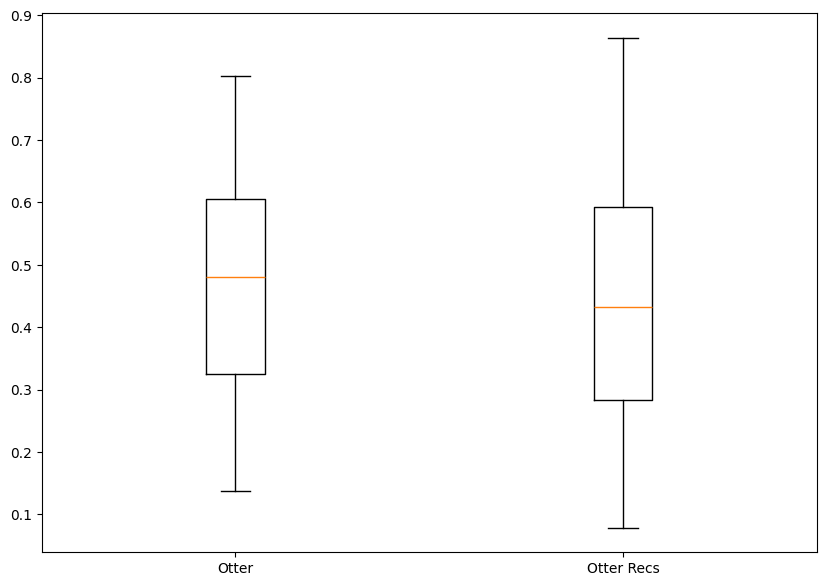

In [ ]:
otter_rec_track_ids = get_playlist_track_ids(spotify, '2BXpMTe72oe8wxQrzagPYl', start=30)
otter_rec_audio_features = get_audio_features_ids(spotify, otter_rec_track_ids)

fig = plt.figure(figsize =(10, 7))
 

real_data =[otter_audio_features['valence'].values, otter_rec_audio_features['valence'].values]

fig = plt.figure(figsize =(10, 7))
 

# Creating axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(["Otter","Otter Recs"])
# Creating plot
bp = ax.boxplot(real_data)
 
# show plot
plt.show()


 
# show plot
plt.show()

<Figure size 1000x700 with 0 Axes>

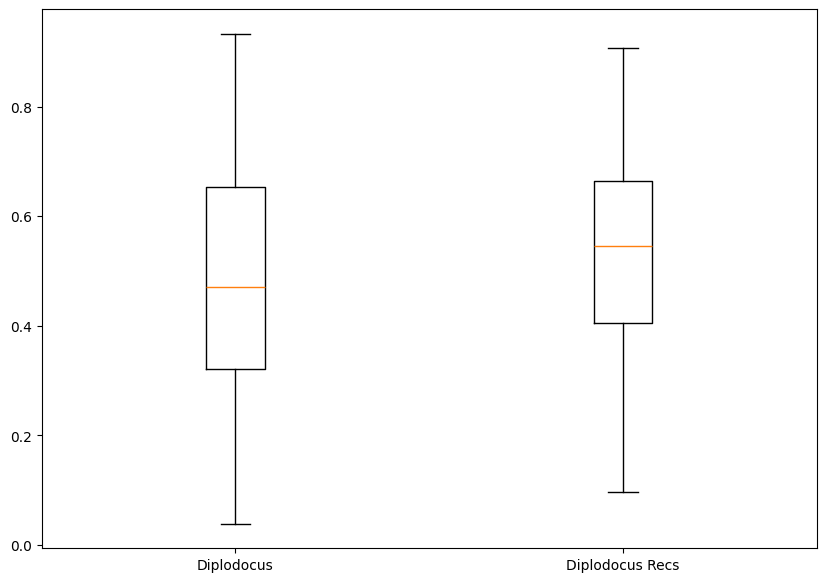

In [ ]:
diplo_rec_track_ids = get_playlist_track_ids(spotify, '3nIy8oMSLjF0FZPI4gmvca', start=85)
diplodocus_rec_audio_features = get_audio_features_ids(spotify, diplo_rec_track_ids)
 
fig = plt.figure(figsize =(10, 7))
 

real_data =[diplodocus_audio_features['valence'].values, diplodocus_rec_audio_features['valence'].values]

fig = plt.figure(figsize =(10, 7))
 

# Creating axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(["Diplodocus","Diplodocus Recs"])
# Creating plot
bp = ax.boxplot(real_data)
 
# show plot
plt.show()


 
# show plot
plt.show()

In [ ]:
happy_rec_track_ids = get_playlist_track_ids(spotify, '1M6WFHCNeMgPHhS77kAP60', start=85, limit=100)
happy_rec_audio_features = get_audio_features_ids(spotify, happy_rec_track_ids)
 
fig = plt.figure(figsize =(10, 7))
 

real_data =[happy_audio_features['valence'].values, happy_rec_audio_features['valence'].values]

fig = plt.figure(figsize =(10, 7))
 

# Creating axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(["Happy","Happy Recs"])

# Creating plot
bp = ax.boxplot(real_data)
 
# show plot
plt.show()


 
# show plot
plt.show()

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=3d8y0t70g7hw2FOWl9Z4Fm:
 Max Retries, reason: too many 429 error responses